In [1]:
import pandas as pd
import numpy as np

## Read data

In [2]:
names = pd.read_csv('./data/names.csv', sep = ',', header = 0).values.flatten()
names

array(['chk_account_', 'num_duration_A2', 'history_', 'purpose_',
       'num_amount_A5', 'svn_account_', 'empl_status_',
       'num_income_share_A8', 'marital_status_', 'guarantor_',
       'num_residence_A11', 'property_', 'num_age_A13', 'other_loans_',
       'housing_', 'num_credits_A16', 'job_', 'num_dependants_A18',
       'telephone_', 'foreign_', 'status'], dtype=object)

In [3]:
data = pd.read_csv('./data/german.data', sep= ' ', names = names)

In [4]:
data.head(3)

,chk_account_,num_duration_A2,history_,purpose_,num_amount_A5,svn_account_,empl_status_,num_income_share_A8,marital_status_,guarantor_,...,property_,num_age_A13,other_loans_,housing_,num_credits_A16,job_,num_dependants_A18,telephone_,foreign_,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1


In [5]:
data.count()

chk_account_           1000
num_duration_A2        1000
history_               1000
purpose_               1000
num_amount_A5          1000
svn_account_           1000
empl_status_           1000
num_income_share_A8    1000
marital_status_        1000
guarantor_             1000
num_residence_A11      1000
property_              1000
num_age_A13            1000
other_loans_           1000
housing_               1000
num_credits_A16        1000
job_                   1000
num_dependants_A18     1000
telephone_             1000
foreign_               1000
status                 1000
dtype: int64

## Prepare features

In [6]:
y = data.status
y.value_counts()

1    700
2    300
dtype: int64

In [7]:
y.mean()

1.3

#### 0. Quick-n-dirty encoding

In [8]:
y_Quick = pd.get_dummies(y).iloc[:,0].values

In [9]:
X_Quick = data.iloc[:,:-1]

In [10]:
import re 

pattern = re.compile(r'num_')
num_mask = np.array([any(re.findall(pattern, x)) for x in names[:-1]])

X_Quick_num = X_Quick.iloc[:,num_mask]
X_Quick_cat = X_Quick.iloc[:,~num_mask]

print(X_Quick_num.columns)
print(X_Quick_cat.columns)

Index(['num_duration_A2', 'num_amount_A5', 'num_income_share_A8',
       'num_residence_A11', 'num_age_A13', 'num_credits_A16',
       'num_dependants_A18'],
      dtype='object')
Index(['chk_account_', 'history_', 'purpose_', 'svn_account_', 'empl_status_',
       'marital_status_', 'guarantor_', 'property_', 'other_loans_',
       'housing_', 'job_', 'telephone_', 'foreign_'],
      dtype='object')


In [11]:
X_Quick_dummies = pd.get_dummies(X_Quick_cat)

In [12]:
X_Quick_ = pd.concat([X_Quick_num, X_Quick_dummies], axis=1)

X_Quick_.columns

Index(['num_duration_A2', 'num_amount_A5', 'num_income_share_A8',
       'num_residence_A11', 'num_age_A13', 'num_credits_A16',
       'num_dependants_A18', 'chk_account__A11', 'chk_account__A12',
       'chk_account__A13', 'chk_account__A14', 'history__A30', 'history__A31',
       'history__A32', 'history__A33', 'history__A34', 'purpose__A40',
       'purpose__A41', 'purpose__A410', 'purpose__A42', 'purpose__A43',
       'purpose__A44', 'purpose__A45', 'purpose__A46', 'purpose__A48',
       'purpose__A49', 'svn_account__A61', 'svn_account__A62',
       'svn_account__A63', 'svn_account__A64', 'svn_account__A65',
       'empl_status__A71', 'empl_status__A72', 'empl_status__A73',
       'empl_status__A74', 'empl_status__A75', 'marital_status__A91',
       'marital_status__A92', 'marital_status__A93', 'marital_status__A94',
       'guarantor__A101', 'guarantor__A102', 'guarantor__A103',
       'property__A121', 'property__A122', 'property__A123', 'property__A124',
       'other_loans__A14

In [13]:
X_Quick_.shape

(1000, 61)

In [14]:
import sklearn.cross_validation as cv

In [15]:
X_Quick_train, X_Quick_test, y_Quick_train, y_Quick_test = cv.train_test_split(X_Quick_, y_Quick, test_size = .2, random_state = 1)

In [16]:
X_Quick_train.shape, X_Quick_test.shape, y_Quick_train.shape, y_Quick_test.shape

((800, 61), (200, 61), (800,), (200,))

#### 0.1  Patsy encoding

In [17]:
import patsy as pt

In [18]:
X_Quick_num.shape, X_Quick_cat.shape

((1000, 7), (1000, 13))

In [19]:
nm = X_Quick_cat.columns
nm

Index(['chk_account_', 'history_', 'purpose_', 'svn_account_', 'empl_status_',
       'marital_status_', 'guarantor_', 'property_', 'other_loans_',
       'housing_', 'job_', 'telephone_', 'foreign_'],
      dtype='object')

In [20]:
form = ' + '.join(nm)
form += ' - 1'
form

'chk_account_ + history_ + purpose_ + svn_account_ + empl_status_ + marital_status_ + guarantor_ + property_ + other_loans_ + housing_ + job_ + telephone_ + foreign_ - 1'

In [21]:
X_Patsy_dummies = pt.dmatrix(form, X_Quick_cat, return_type='dataframe')

In [22]:
X_Patsy = pd.concat([X_Quick_num, X_Patsy_dummies], axis=1)

In [23]:
X_Patsy.shape

(1000, 49)

In [24]:
X_Patsy_train, X_Patsy_test, y_Patsy_train, y_Patsy_test = \
  cv.train_test_split(X_Patsy, y_Quick, test_size=.2, random_state =1)

In [25]:
X_Patsy_train.shape, X_Patsy_test.shape, y_Patsy_train.shape, y_Patsy_test.shape

((800, 49), (200, 49), (800,), (200,))

#### 1. Type of checking account

A11 : ... < 0 DM   
A12 : 0 <= ... < 200 DM   
A13 : ... >= 200 DM / salary assignments for at least 1 year   
A14 : no checking account   

In [26]:
data.groupby('chk_account_').size()

chk_account_
A11    274
A12    269
A13     63
A14    394
dtype: int64

In [27]:
data.groupby('chk_account_')['status'].agg('mean')

chk_account_
A11    1.492701
A12    1.390335
A13    1.222222
A14    1.116751
Name: status, dtype: float64

In [28]:
chk_account = pd.get_dummies(data.chk_account_, 'Chk_Account')
chk_account_= chk_account.drop('Chk_Account_A13', 1)
chk_account_.head(3)

,Chk_Account_A11,Chk_Account_A12,Chk_Account_A14
0,1,0,0
1,0,1,0
2,0,0,1


In [29]:
X = chk_account_

#### 2. Duration of credit line

In [30]:
% matplotlib inline
import matplotlib.pyplot as plt

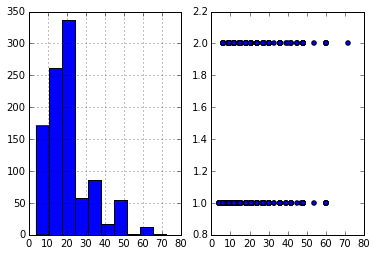

In [31]:
plt.subplot(1,2,1)
data.num_duration_A2.hist() # might need pre/post -processing as data is skewed ???
plt.subplot(1,2,2)
plt.scatter( x=data.num_duration_A2, y = y) # cut data into 2-3-4 bins?
plt.show()

In [32]:
dur = data.num_duration_A2

In [33]:
X = pd.concat([X,dur], axis=1)

#### 3. Credit history

A30 : no credits taken/ all credits paid back duly   
A31 : all credits at this bank paid back duly   
A32 : existing credits paid back duly till now   
A33 : delay in paying off in the past   
A34 : critical account/ other credits existing (not at this bank)   

In [34]:
data.history_.value_counts()

A32    530
A34    293
A33     88
A31     49
A30     40
dtype: int64

In [35]:
data.groupby('history_')['status'].agg('mean')

history_
A30    1.625000
A31    1.571429
A32    1.318868
A33    1.318182
A34    1.170648
Name: status, dtype: float64

In [36]:
hist = pd.get_dummies(data['history_'], 'History')
hist_ = hist.drop('History_A33', 1)
hist_.head(3)

,History_A30,History_A31,History_A32,History_A34
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1


In [37]:
X = pd.concat([X, hist_], axis=1)

#### 4. Purpose

A40 : car (new)   
A41 : car (used)   
A42 : furniture/equipment   
A43 : radio/television   
A44 : domestic appliances   
A45 : repairs   
A46 : education   
A47 : (vacation - does not exist?)   
A48 : retraining   
A49 : business   
A410 : others   

In [38]:
data.purpose_.value_counts()

A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
dtype: int64

In [39]:
data.groupby('purpose_')['status'].agg('mean')

purpose_
A40     1.380342
A41     1.165049
A410    1.416667
A42     1.320442
A43     1.221429
A44     1.333333
A45     1.363636
A46     1.440000
A48     1.111111
A49     1.350515
Name: status, dtype: float64

In [40]:
purp = pd.get_dummies(data.purpose_, 'Purpose')
purp_ = purp.drop('Purpose_A44', 1)
X = pd.concat([X, purp_],1)

#### 5. Credit amount

In [41]:
amnt = data.num_amount_A5

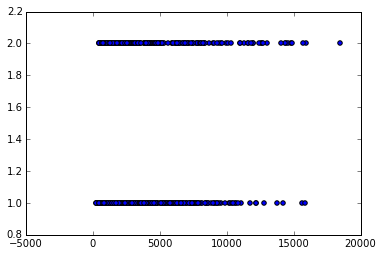

In [42]:
plt.scatter(x=amnt, y=data.status);

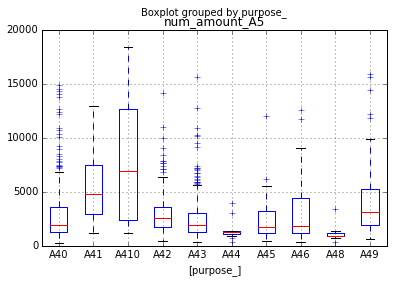

In [43]:
data[['num_amount_A5', 'purpose_']].boxplot(by='purpose_');

In [44]:
X = pd.concat([X, amnt], 1)

#### 6. Savings account/bonds 

A61 : ... < 100 DM   
A62 : 100 <= ... < 500 DM   
A63 : 500 <= ... < 1000 DM   
A64 : .. >= 1000 DM   
A65 : unknown/ no savings account   

In [45]:
data.svn_account_.value_counts()

A61    603
A65    183
A62    103
A63     63
A64     48
dtype: int64

In [46]:
data.groupby('svn_account_')['status'].agg('mean')

svn_account_
A61    1.359867
A62    1.330097
A63    1.174603
A64    1.125000
A65    1.174863
Name: status, dtype: float64

In [47]:
svn = pd.get_dummies(data.svn_account_, 'Svn_account')
svn.head(3)

,Svn_account_A61,Svn_account_A62,Svn_account_A63,Svn_account_A64,Svn_account_A65
0,0,0,0,0,1
1,1,0,0,0,0
2,1,0,0,0,0


In [48]:
svn_ = svn.drop('Svn_account_A62', axis=1)

In [49]:
X = pd.concat([X,svn_],axis=1)

#### 7. Present employment status

A71 : unemployed   
A72 : ... < 1 year   
A73 : 1 <= ... < 4 years   
A74 : 4 <= ... < 7 years   
A75 : .. >= 7 years   

In [50]:
data.empl_status_.value_counts()

A73    339
A75    253
A74    174
A72    172
A71     62
dtype: int64

In [51]:
data.groupby('empl_status_')['status'].agg('mean')

empl_status_
A71    1.370968
A72    1.406977
A73    1.306785
A74    1.224138
A75    1.252964
Name: status, dtype: float64

In [52]:
empl = pd.get_dummies(data.empl_status_, "Emp_status")
empl.head(3)

,Emp_status_A71,Emp_status_A72,Emp_status_A73,Emp_status_A74,Emp_status_A75
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,1,0


In [53]:
empl_ = empl.drop('Emp_status_A73',axis=1)

In [54]:
X = pd.concat([X,empl], axis=1)

#### 8. Installment rate in percentage of disposable income 

In [55]:
rt = data.num_income_share_A8

In [56]:
rt.describe()

count    1000.000000
mean        2.973000
std         1.118715
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: num_income_share_A8, dtype: float64

In [57]:
rt.value_counts()

4    476
2    231
3    157
1    136
dtype: int64

In [58]:
data.groupby('num_income_share_A8')['status'].agg('mean')

num_income_share_A8
1    1.250000
2    1.268398
3    1.286624
4    1.334034
Name: status, dtype: float64

In [59]:
X = pd.concat([X,rt], axis=1)

#### 9. Personal status and sex 

A91 : male : divorced/separated   
A92 : female : divorced/separated/married   
A93 : male : single   
A94 : male : married/widowed   
A95 : female : single    

In [60]:
data.marital_status_.value_counts()

A93    548
A92    310
A94     92
A91     50
dtype: int64

In [61]:
data.groupby('marital_status_')['status'].agg('mean')

marital_status_
A91    1.400000
A92    1.351613
A93    1.266423
A94    1.271739
Name: status, dtype: float64

In [62]:
mar = pd.get_dummies(data.marital_status_, 'Marital_status')

In [63]:
mar_ = mar.drop('Marital_status_A94', axis=1)

In [64]:
X = pd.concat([X, mar_], axis=1)

#### 10. Other debtors / guarantors 

A101 : none  
A102 : co-applicant  
A103 : guarantor  

In [65]:
data.guarantor_.value_counts()

A101    907
A103     52
A102     41
dtype: int64

In [66]:
data.groupby('guarantor_')['status'].agg('mean')

guarantor_
A101    1.299890
A102    1.439024
A103    1.192308
Name: status, dtype: float64

In [67]:
guar = pd.get_dummies(data.guarantor_, 'Guarantor')
guar.head(3)

,Guarantor_A101,Guarantor_A102,Guarantor_A103
0,1,0,0
1,1,0,0
2,1,0,0


In [68]:
guar_ = guar.drop('Guarantor_A101', axis=1)

In [69]:
X = pd.concat([X,guar_], axis=1)

#### 11. Present residence since 

In [70]:
res = data.num_residence_A11

In [71]:
res.describe()

count    1000.000000
mean        2.845000
std         1.103718
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: num_residence_A11, dtype: float64

In [72]:
data.groupby('num_residence_A11')['status'].agg('mean')

num_residence_A11
1    1.276923
2    1.314935
3    1.288591
4    1.300242
Name: status, dtype: float64

In [73]:
X = pd.concat([X,res], axis=1)

#### 12. Property 

A121 : real estate   
A122 : if not A121 : building society savings agreement/ life insurance   
A123 : if not A121/A122 : car or other, not in attribute 6   
A124 : unknown / no property 

In [74]:
data.property_.value_counts()

A123    332
A121    282
A122    232
A124    154
dtype: int64

In [75]:
data.groupby('property_')['status'].agg('mean')

property_
A121    1.212766
A122    1.306034
A123    1.307229
A124    1.435065
Name: status, dtype: float64

In [76]:
prop = pd.get_dummies(data.property_, 'Property')
prop.head(3)

,Property_A121,Property_A122,Property_A123,Property_A124
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0


In [77]:
prop_ = prop.drop('Property_A122', axis=1)

In [78]:
X = pd.concat([X,prop_], axis=1)

#### 13. Age in years 

In [79]:
age = data.num_age_A13

In [80]:
age.describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: num_age_A13, dtype: float64

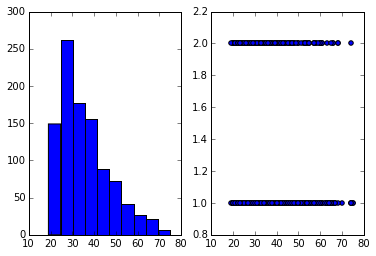

In [81]:
plt.subplot(1,2,1)
plt.hist(age)
plt.subplot(1,2,2)
plt.scatter(x=age, y=y);

In [82]:
import re
ind = np.array([any(re.findall('^num',x)) for x in names])
names[ind]

array(['num_duration_A2', 'num_amount_A5', 'num_income_share_A8',
       'num_residence_A11', 'num_age_A13', 'num_credits_A16',
       'num_dependants_A18'], dtype=object)

#### 14. Other installment plans 

A141 : bank  
A142 : stores  
A143 : none  

In [83]:
data.other_loans_.value_counts()

A143    814
A141    139
A142     47
dtype: int64

In [84]:
data.groupby('other_loans_')['status'].agg('mean')

other_loans_
A141    1.410072
A142    1.404255
A143    1.275184
Name: status, dtype: float64

In [85]:
inst = pd.get_dummies(data.other_loans_, 'Installments')
inst.head(3)

,Installments_A141,Installments_A142,Installments_A143
0,0,0,1
1,0,0,1
2,0,0,1


In [86]:
inst_ = inst.drop('Installments_A143', axis=1)

In [87]:
X = pd.concat([X,inst_], axis=1)

#### 15. Housing 

A151 : rent  
A152 : own  
A153 : for free  

In [88]:
data.housing_.value_counts()

A152    713
A151    179
A153    108
dtype: int64

In [89]:
data.groupby('housing_')['status'].agg('mean')

housing_
A151    1.391061
A152    1.260870
A153    1.407407
Name: status, dtype: float64

In [90]:
hous = pd.get_dummies(data.housing_, 'Housing')
hous.head(3)

,Housing_A151,Housing_A152,Housing_A153
0,0,1,0
1,0,1,0
2,0,1,0


In [91]:
hous_ = hous.drop('Housing_A152', axis=1)

In [92]:
X = pd.concat([X, hous_], axis=1)

#### 16. Number of existing credits at this bank 

In [93]:
numc = data.num_credits_A16

In [94]:
numc.describe()

count    1000.000000
mean        1.407000
std         0.577654
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: num_credits_A16, dtype: float64

In [95]:
data.num_credits_A16.value_counts()

1    633
2    333
3     28
4      6
dtype: int64

In [96]:
data.groupby('num_credits_A16')['status'].agg('mean')

num_credits_A16
1    1.315956
2    1.276276
3    1.214286
4    1.333333
Name: status, dtype: float64

In [97]:
numc = pd.get_dummies(data.num_credits_A16, 'Num_credits')
numc.head(3)

,Num_credits_1,Num_credits_2,Num_credits_3,Num_credits_4
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0


In [98]:
numc_ = numc.drop('Num_credits_1', axis=1)

In [99]:
X = pd.concat([X,numc_], axis=1)

#### 17. Job 

A171 : unemployed/ unskilled - non-resident  
A172 : unskilled - resident  
A173 : skilled employee / official  
A174 : management/ self-employed/ highly qualified employee/ officer  

In [100]:
data.job_.value_counts()

A173    630
A172    200
A174    148
A171     22
dtype: int64

In [101]:
data.groupby('job_')['status'].agg('mean')

job_
A171    1.318182
A172    1.280000
A173    1.295238
A174    1.344595
Name: status, dtype: float64

In [102]:
jb = pd.get_dummies(data.job_, 'Job')
jb.head(3)

,Job_A171,Job_A172,Job_A173,Job_A174
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0


In [103]:
jb_ = jb.drop('Job_A173', axis=1)

In [104]:
x = pd.concat([X, jb_], axis=1)

#### 18. Number of people being liable to provide maintenance for 

In [105]:
dep = data.num_dependants_A18

In [106]:
data.num_dependants_A18.value_counts()

1    845
2    155
dtype: int64

In [107]:
data.groupby('num_dependants_A18')['status'].agg('mean')

num_dependants_A18
1    1.300592
2    1.296774
Name: status, dtype: float64

In [108]:
dpn = pd.get_dummies(data.num_dependants_A18, 'Dependants')
dpn.head(3)

,Dependants_1,Dependants_2
0,1,0
1,1,0
2,0,1


In [109]:
X = pd.concat([X, dpn['Dependants_2']], axis=1)

#### 19. Telephone 

A191 : none  
A192 : yes, registered under the customers name  

In [110]:
data.telephone_.value_counts()

A191    596
A192    404
dtype: int64

In [111]:
data.groupby('telephone_')['status'].agg('mean')

telephone_
A191    1.313758
A192    1.279703
Name: status, dtype: float64

In [112]:
tel = pd.get_dummies(data.telephone_, 'Telephone')
tel.head(3)

,Telephone_A191,Telephone_A192
0,0,1
1,1,0
2,1,0


In [113]:
X = pd.concat([X, tel['Telephone_A192']], axis=1)

#### 20. Foreign worker 

A201 : yes  
A202 : no   

In [114]:
data.foreign_.value_counts()

A201    963
A202     37
dtype: int64

In [115]:
data.groupby('foreign_')['status'].agg('mean')

foreign_
A201    1.307373
A202    1.108108
Name: status, dtype: float64

In [116]:
fr = pd.get_dummies(data.foreign_, 'Foreign')
fr.head(3)

,Foreign_A201,Foreign_A202
0,1,0
1,1,0
2,1,0


In [117]:
X = pd.concat([X, fr['Foreign_A202']], axis=1)

In [118]:
X.shape

(1000, 47)

## Train Test Split

In [119]:
X_train, X_test, y_train, y_test = cv.train_test_split(X,y, test_size=.2, random_state=1)

In [120]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 47), (200, 47), (800,), (200,))

## Logistic model

In [121]:
import sklearn.linear_model as lm
import sklearn.grid_search as gs

In [122]:
lm_mod = lm.LogisticRegression(class_weight = 'auto', random_state=1, C=1e-5)
lm_mod

LogisticRegression(C=1e-05, class_weight='auto', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0)

In [123]:
folds = cv.StratifiedShuffleSplit(y_train, n_iter=20, test_size=.1, random_state=1)
lm_grid = {'C': np.logspace(-5,5,10),
           'penalty': ['l1','l2']}


lm_gsearch = gs.GridSearchCV(lm_mod, param_grid = lm_grid, n_jobs=-1, cv=folds)
lm_gsearch

GridSearchCV(cv=StratifiedShuffleSplit(labels=[1 1 ..., 2 2], n_iter=20, test_size=0.1, random_state=1),
       error_score='raise',
       estimator=LogisticRegression(C=1e-05, class_weight='auto', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'C': array([  1.00000e-05,   1.29155e-04,   1.66810e-03,   2.15443e-02,
         2.78256e-01,   3.59381e+00,   4.64159e+01,   5.99484e+02,
         7.74264e+03,   1.00000e+05]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [124]:
lm_gsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[1 1 ..., 2 2], n_iter=20, test_size=0.1, random_state=1),
       error_score='raise',
       estimator=LogisticRegression(C=1e-05, class_weight='auto', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'C': array([  1.00000e-05,   1.29155e-04,   1.66810e-03,   2.15443e-02,
         2.78256e-01,   3.59381e+00,   4.64159e+01,   5.99484e+02,
         7.74264e+03,   1.00000e+05]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [125]:
lm_gsearch.best_score_

0.70937499999999998

In [126]:
(lm_gsearch.best_estimator_.predict(X_test) == y_test).mean()

0.72499999999999998

#### Quick-n-dirty LGM

In [127]:
lm_gsearch.fit(X_Quick_train, y_Quick_train)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[1 1 ..., 2 2], n_iter=20, test_size=0.1, random_state=1),
       error_score='raise',
       estimator=LogisticRegression(C=1e-05, class_weight='auto', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'C': array([  1.00000e-05,   1.29155e-04,   1.66810e-03,   2.15443e-02,
         2.78256e-01,   3.59381e+00,   4.64159e+01,   5.99484e+02,
         7.74264e+03,   1.00000e+05]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [128]:
# Quick-n-Dirty
lm_gsearch.best_score_

0.71499999999999997

In [129]:
#Quick-n-Dirty
(lm_gsearch.best_estimator_.predict(X_Quick_test) == y_Quick_test).mean()

0.71499999999999997

#### Patsy encoded LGM

In [130]:
lm_gsearch.fit(X_Patsy_train, y_Patsy_train)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[1 1 ..., 2 2], n_iter=20, test_size=0.1, random_state=1),
       error_score='raise',
       estimator=LogisticRegression(C=1e-05, class_weight='auto', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'C': array([  1.00000e-05,   1.29155e-04,   1.66810e-03,   2.15443e-02,
         2.78256e-01,   3.59381e+00,   4.64159e+01,   5.99484e+02,
         7.74264e+03,   1.00000e+05]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [131]:
# Patsy encoded
lm_gsearch.best_score_

0.71375

In [132]:
# Patsy encoded
(lm_gsearch.best_estimator_.predict(X_Patsy_test) == y_Patsy_test).mean()

0.69499999999999995

## ElasticNet()

In [200]:
en = lm.SGDClassifier(loss= 'log', penalty = 'elasticnet', random_state=1, class_weight='auto', n_jobs=-1)

en

SGDClassifier(alpha=0.0001, average=False, class_weight='auto', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=-1,
       penalty='elasticnet', power_t=0.5, random_state=1, shuffle=True,
       verbose=0, warm_start=False)

In [204]:
grid = {'l1_ratio': np.linspace(0,1,21),
       'alpha': np.logspace(-5,-1, 11)}

In [205]:
grid_search = gs.GridSearchCV(en, param_grid=grid, n_jobs=-1, cv=folds)

grid_search

GridSearchCV(cv=StratifiedShuffleSplit(labels=[1 1 ..., 2 2], n_iter=20, test_size=0.1, random_state=1),
       error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight='auto', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=-1,
       penalty='elasticnet', power_t=0.5, random_state=1, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'l1_ratio': array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ]), 'alpha': array([  1.00000e-05,   2.51189e-05,   6.30957e-05,   1.58489e-04,
         3.98107e-04,   1.00000e-03,   2.51189e-03,   6.30957e-03,
         1.58489e-02,   3.98107e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose

In [206]:
grid_search.fit(X_Patsy_train, y_Patsy_train)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[1 1 ..., 2 2], n_iter=20, test_size=0.1, random_state=1),
       error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight='auto', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=-1,
       penalty='elasticnet', power_t=0.5, random_state=1, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'l1_ratio': array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ]), 'alpha': array([  1.00000e-05,   2.51189e-05,   6.30957e-05,   1.58489e-04,
         3.98107e-04,   1.00000e-03,   2.51189e-03,   6.30957e-03,
         1.58489e-02,   3.98107e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose

In [207]:
grid_search.best_score_

0.52000000000000002

## Random Forest

In [133]:
import sklearn.ensemble as ens

In [134]:
rf_mod = ens.ExtraTreesClassifier(class_weight='auto', n_jobs=-1, n_estimators=1000, random_state=1)
rf_mod

ExtraTreesClassifier(bootstrap=False, class_weight='auto', criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [135]:
rf_grid = {'max_depth': np.linspace(1,10, 10)}

rf_gridSearch = gs.GridSearchCV(rf_mod, param_grid=rf_grid, n_jobs=-1, cv=folds)
rf_gridSearch

GridSearchCV(cv=StratifiedShuffleSplit(labels=[1 1 ..., 2 2], n_iter=20, test_size=0.1, random_state=1),
       error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight='auto', criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'max_depth': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [136]:
rf_gridSearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[1 1 ..., 2 2], n_iter=20, test_size=0.1, random_state=1),
       error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight='auto', criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'max_depth': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [137]:
rf_gridSearch.best_score_

0.739375

In [138]:
(rf_gridSearch.best_estimator_.predict(X_test) == y_test).mean()

0.73999999999999999

#### Quick-n-dirty RF

In [139]:
# Quick-n-Dirty
rf_gridSearch.fit(X_Quick_train, y_Quick_train)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[1 1 ..., 2 2], n_iter=20, test_size=0.1, random_state=1),
       error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight='auto', criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'max_depth': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [140]:
# Quick-n-Dirty
rf_gridSearch.best_score_

0.739375

In [141]:
# Quick-n-Dirty
(rf_gridSearch.best_estimator_.predict(X_Quick_test) == y_Quick_test).mean()

0.76000000000000001

#### Patsy encoded RF

In [142]:
rf_gridSearch.fit(X_Patsy_train, y_Patsy_train)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[1 1 ..., 2 2], n_iter=20, test_size=0.1, random_state=1),
       error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight='auto', criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'max_depth': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [143]:
# Patsy encoded
rf_gridSearch.best_score_

0.73687499999999995

In [144]:
# Patsy encoded
(rf_gridSearch.best_estimator_.predict(X_Patsy_test) == y_Patsy_test).mean()

0.73999999999999999

## Gradient Boosting Classifier

In [145]:
mod_gbm = ens.GradientBoostingClassifier(random_state=1, n_estimators=1000)
mod_gbm

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              random_state=1, subsample=1.0, verbose=0, warm_start=False)

In [146]:
import scipy.stats as st

params = {'max_leaf_nodes'  : st.randint(3,11),             # add 10 n_iter for every line
          'min_samples_leaf': st.randint(3,11),             # add 10 n_iter for every line
          'max_features'    : st.uniform(loc=.1,scale= .5), # add 10 n_iter for every line
          'learning_rate'   : np.logspace(-3,-1,3)
         }

rgrid_search = gs.RandomizedSearchCV(mod_gbm, param_distributions = params,
                                      n_iter=40,            # those add up to 40
                                      random_state=1, cv=folds, n_jobs=-1)
rgrid_search

RandomizedSearchCV(cv=StratifiedShuffleSplit(labels=[1 1 ..., 2 2], n_iter=20, test_size=0.1, random_state=1),
          error_score='raise',
          estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              random_state=1, subsample=1.0, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa19b955978>, 'learning_rate': array([ 0.001,  0.01 ,  0.1  ]), 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa19b955198>, 'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa19b9559e8>},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          scoring=None, verbose=

In [147]:
rgrid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(labels=[1 1 ..., 2 2], n_iter=20, test_size=0.1, random_state=1),
          error_score='raise',
          estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              random_state=1, subsample=1.0, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa19b955978>, 'learning_rate': array([ 0.001,  0.01 ,  0.1  ]), 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa19b955198>, 'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa19b9559e8>},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          scoring=None, verbose=

In [148]:
rgrid_search.best_score_

0.76500000000000001

In [149]:
rgrid_search.best_params_

{'learning_rate': 0.01,
 'max_features': 0.20564417913112212,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 9}

In [150]:
(rgrid_search.best_estimator_.predict(X_test) == y_test).mean()

0.76000000000000001

#### Quick-n-dirty GBM

In [151]:
# Quick-n-Dirty
rgrid_search.fit(X_Quick_train, y_Quick_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(labels=[1 1 ..., 2 2], n_iter=20, test_size=0.1, random_state=1),
          error_score='raise',
          estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              random_state=1, subsample=1.0, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa19b955978>, 'learning_rate': array([ 0.001,  0.01 ,  0.1  ]), 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa19b955198>, 'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa19b9559e8>},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          scoring=None, verbose=

In [152]:
# Quick-n-Dirty
rgrid_search.best_score_

0.76187499999999997

In [153]:
# Quick-n-Dirty
(rgrid_search.best_estimator_.predict(X_Quick_test) == y_Quick_test).mean()

0.73999999999999999

#### Patsy encoded GBM

In [154]:
rgrid_search.fit(X_Patsy_train, y_Patsy_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(labels=[1 1 ..., 2 2], n_iter=20, test_size=0.1, random_state=1),
          error_score='raise',
          estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              random_state=1, subsample=1.0, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa19b955978>, 'learning_rate': array([ 0.001,  0.01 ,  0.1  ]), 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa19b955198>, 'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa19b9559e8>},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          scoring=None, verbose=

In [155]:
# Patsy encoded
rgrid_search.best_score_

0.75687499999999996

In [156]:
# Patsy encoded
(rgrid_search.best_estimator_.predict(X_Patsy_test) == y_Patsy_test).mean()

0.745

## K-nearest Neghbours

In [157]:
import sklearn.neighbors as nb

In [158]:
mod_knn = nb.KNeighborsClassifier()
mod_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [159]:
knn_grid = {'n_neighbors': st.randint(3,11),
            'weights'    : ['uniform', 'distance'],
            'leaf_size'  : st.randint(10,31),
            'p'          : [1,2]}


knn_gridSearch = gs.RandomizedSearchCV(mod_knn, param_distributions = knn_grid,
                                      n_iter=40,            # those add up to 40
                                      random_state=1, cv=folds, n_jobs=-1)

knn_gridSearch

RandomizedSearchCV(cv=StratifiedShuffleSplit(labels=[1 1 ..., 2 2], n_iter=20, test_size=0.1, random_state=1),
          error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
          fit_params={}, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa19ba477b8>, 'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa19ba47c18>, 'p': [1, 2], 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          scoring=None, verbose=0)

In [160]:
knn_gridSearch.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(labels=[1 1 ..., 2 2], n_iter=20, test_size=0.1, random_state=1),
          error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
          fit_params={}, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa19ba477b8>, 'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa19ba47c18>, 'p': [1, 2], 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          scoring=None, verbose=0)

In [161]:
knn_gridSearch.best_score_

0.70374999999999999